In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_parquet("../data/staging/tracks_search_lofi.parquet")
df.head()


,track_id,title,description,tag_list,tags,genre,user_id,username,created_at,duration,bpm,key,playback_count,like_count,repost_count,permalink_url,streamable,engagement_score
0,1975307539,LOFI,"FFP, MUST CREDIT (BOSS PRODUCTION) IN TITLE","""Alternative Rock"" ""Hip-hop & Rap""","""alternative rock"" ""hip-hop & rap""",ambient,1425191382,ProdByBoss,2024/12/06 15:36:13 +0000,162116,None,None,0,0,0,https://soundcloud.com/prodbyboss/lofi?utm_med...,True,0.000000
1,2040520860,Mở Lối Cho Em Lofi Chill Lương Quý Tuấn - Lof...,,,,learning,1502678941,Chill VN,2025/02/23 13:47:01 +0000,196467,None,None,264246,2209,28,https://soundcloud.com/chill1710/mo-loi-cho-em...,True,0.011346
2,1743774435,Nhạc Lofi 2024 Những Bản Lofi Mix Mạnh Tít Ch...,,,,audiobooks,1357651014,Phương Ly,2024/02/11 13:14:20 +0000,7454877,None,None,2520191,37984,361,https://soundcloud.com/anh-tran-111163943/nhac...,True,0.126191
3,1763056107,Nhạc Lofi 2024 Những Bản Lofi Mix Chill Nhẹ N...,,,,deep house,1364882640,Công Thành Remix,2024/03/02 08:30:43 +0000,7679478,None,None,928274,12881,73,https://soundcloud.com/tran-linh-961571259/nh-...,True,0.041074
4,942310723,"Phố Cũ Còn Anh Lofi, Anh Mệt Rồi Lofi....",,,,,562195746,Shino,2020/12/06 06:28:24 +0000,356571,None,None,3386833,27798,226,https://soundcloud.com/nguy-n-ho-ng-tu-n-19794...,True,0.134658


Basic stats

In [4]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_id,1200.0,NaN,NaN,NaN,1431546310.5225,412656500.643775,167167671.0,1098479787.25,1401054764.5,1783819287.0,2126573043.0
title,1200,362,Haru Haru lofi,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,1200,116,,791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tag_list,1200,98,,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tags,1200,98,,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genre,1200,41,,614,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_id,1200.0,NaN,NaN,NaN,846096578.9275,406621451.578063,945235.0,480861981.0,936134923.0,1149871243.0,1548671340.0
username,1200,283,Duc Truong Nguyen,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
created_at,1200,361,2024/03/02 08:30:43 +0000,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,1200.0,NaN,NaN,NaN,774389.721667,1528647.34184,30000.0,209633.0,253205.0,315317.75,8289672.0


Missingness

<Axes: >

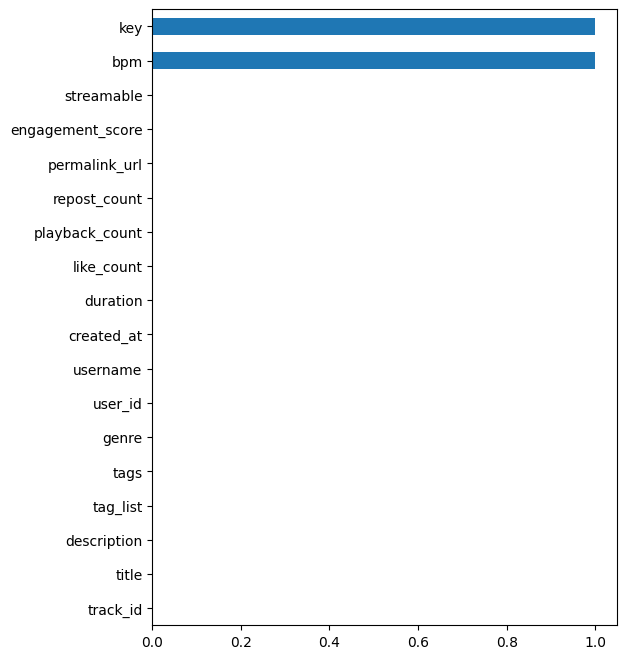

In [5]:
df.isna().mean().sort_values().plot.barh(figsize=(6,8))


Distribution of engagement

Text(0.5, 1.0, 'Distribution of playback counts')

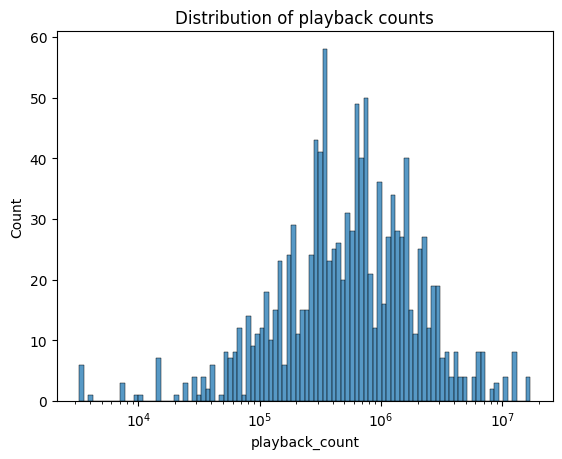

In [6]:
sns.histplot(df["playback_count"], bins=100, log_scale=True)
plt.title("Distribution of playback counts")


Tags / Genres

<Axes: ylabel='genre'>

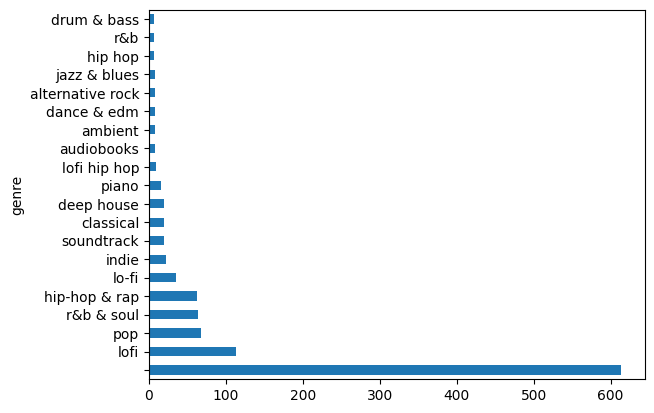

In [7]:
df["genre"].value_counts().head(20).plot.barh()


Engagement vs. tags

In [9]:
df.groupby("genre")["engagement_score"].mean().sort_values(ascending=False).head(20)


genre
shadow rap          0.249410
r&b                 0.170244
house               0.155012
lofi hip hop        0.137640
lo-fi               0.113924
alternative rock    0.113264
bedroom pop         0.108074
r&b & soul          0.074086
country             0.073840
dance & edm         0.072526
audiobooks          0.070012
lofi                0.063609
lofi rnb            0.057840
                    0.057206
classical           0.053577
piano               0.052145
soundtrack          0.046830
pop                 0.044641
drum & bass         0.043098
inspirational       0.041524
Name: engagement_score, dtype: float64